Row 0/150
Row 1/150
Row 2/150
Row 3/150
Row 4/150
Row 5/150
Row 6/150
Row 7/150
Row 8/150
Row 9/150
Row 10/150
Row 11/150
Row 12/150
Row 13/150
Row 14/150
Row 15/150
Row 16/150
Row 17/150
Row 18/150
Row 19/150
Row 20/150
Row 21/150
Row 22/150
Row 23/150
Row 24/150
Row 25/150
Row 26/150
Row 27/150
Row 28/150
Row 29/150
Row 30/150
Row 31/150
Row 32/150
Row 33/150
Row 34/150
Row 35/150
Row 36/150
Row 37/150
Row 38/150
Row 39/150
Row 40/150
Row 41/150
Row 42/150
Row 43/150
Row 44/150
Row 45/150
Row 46/150
Row 47/150
Row 48/150
Row 49/150
Row 50/150
Row 51/150
Row 52/150
Row 53/150
Row 54/150
Row 55/150
Row 56/150
Row 57/150
Row 58/150
Row 59/150
Row 60/150
Row 61/150
Row 62/150
Row 63/150
Row 64/150
Row 65/150
Row 66/150
Row 67/150
Row 68/150
Row 69/150
Row 70/150
Row 71/150
Row 72/150
Row 73/150
Row 74/150
Row 75/150
Row 76/150
Row 77/150
Row 78/150
Row 79/150
Row 80/150
Row 81/150
Row 82/150
Row 83/150
Row 84/150
Row 85/150
Row 86/150
Row 87/150
Row 88/150
Row 89/150
Row 90/150
Row 91/15

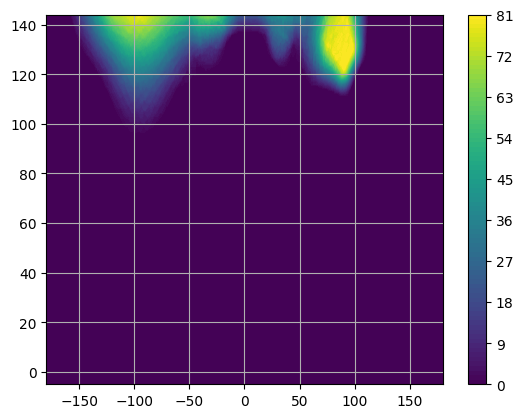

In [8]:
from project_path import data_path
from ess.utils import mask_blockage
import spiceypy as cspice
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm


def rtpairs(r, n):

    for i in range(len(r)):
       for j in range(n[i]):
        yield r[i], j*(2 * np.pi / n[i])

cspice.furnsh('/Users/randres/git/spice/bepicolombo/kernels/mk/bc_plan.tm')
cspice.furnsh(
    os.path.join(data_path, 'test', 'bc_mpo_hga_schulte_vector_test_v01.bc'))
cspice.furnsh(
    os.path.join(data_path, 'test', 'bc_mpo_sc_bus_v03.bds'))

time_step_seconds = 10 # time step
et0 = cspice.utc2et('2021-01-01T00:00:00')
etf = cspice.utc2et('2021-01-01T00:01:00')
times = np.linspace(et0, etf, int((etf - et0) / time_step_seconds))
el_angles = np.arange(-5.0, 145, 1)
az_angles = np.arange(-180, 181, 1)
coverage_map = np.zeros((el_angles.shape[0], az_angles.shape[0]))
et = et0
output = []
output_b = []
T = [1, 5, 10, 15, 20, 30, 40]
R = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
row_counter = el_angles.shape[0]
for i in range(el_angles.shape[0]):
    for j in range(az_angles.shape[0]):
        el = el_angles[i]
        az = az_angles[j]
        rs = []
        ds = []
        for r, t in rtpairs(R, T):
            r0 = np.array([r * np.cos(t), r * np.sin(t), 0]) / 1000
            r_opt = cspice.spkpos('MPO_HGA_OPT_EL', et, 'MPO_SPACECRAFT', 'NONE', 'MPO_SPACECRAFT')[0]
            M = cspice.pxform('MPO_HGA', 'MPO_SPACECRAFT', et)
            r = cspice.mxv(M, r0) + r_opt
            d = cspice.mxv(M, [0, 0, 1])
            rs.append(r)
            ds.append(d)
            
        xarray, flag_array = cspice.dskxv(False, 'MPO_SPACECRAFT', [-121000], et, 'MPO_SPACECRAFT',
                         rs, ds)
        
        coverage_map[i, j] += len(list(filter(lambda x: x, flag_array)))           
        et += time_step_seconds
    print(f'Row {i}/{row_counter}') 

plt.contourf(range(-180, 181), range(-5, 145), coverage_map, 100)
plt.colorbar()
plt.grid()
plt.show()

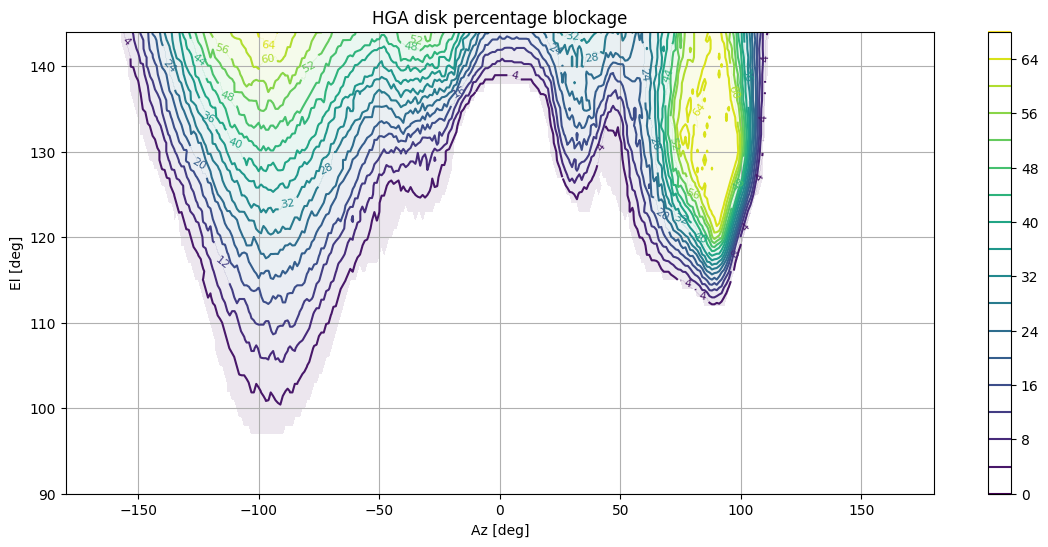

In [9]:
coverage = coverage_map / np.sum(T) * 100
coverage[coverage == 0] = np.nan

fig = plt.figure(figsize=(14, 6))
plt.contourf(range(-180, 181), range(-5, 145), coverage, 20, alpha=0.1)
contour_lines = plt.contour(range(-180, 181), range(-5, 145), coverage, 20)
plt.clabel(contour_lines, contour_lines.levels, inline=True, fmt='%1.0f', fontsize=8)
plt.colorbar()
plt.ylim([90, 144])
plt.grid()
plt.ylabel('El [deg]')
plt.xlabel('Az [deg]')
plt.title('HGA disk percentage blockage')
plt.show()

-5.0
-4.0
-3.0
-2.0
-1.0
0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
54150


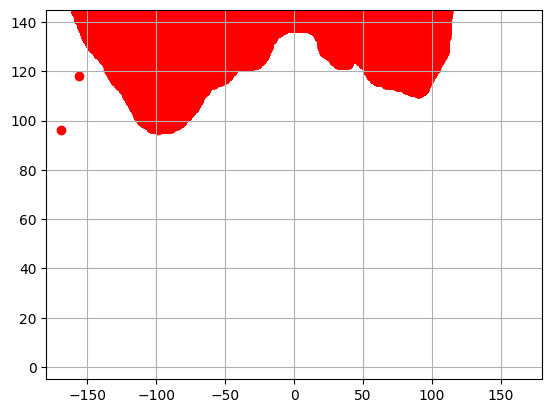

In [41]:
el_angles = np.arange(-5.0, 145, 1)
az_angles = np.arange(-180, 181, 1)
et = et0
output = []
output_b = []
for el in el_angles:
    for az in az_angles:
        for n in range(0, 360, 12):
            n = np.deg2rad(n)
            r0 = np.array([np.cos(n), np.sin(n), 0]) * 0.0005
            r_opt = cspice.spkpos('MPO_HGA_OPT_EL', et, 'MPO_SPACECRAFT', 'NONE', 'MPO_SPACECRAFT')[0]
            M = cspice.pxform('MPO_HGA', 'MPO_SPACECRAFT', et)
            r = cspice.mxv(M, r0) + r_opt
            d = cspice.mxv(M, [0, 0, 1])

            xarray, flag = cspice.dskxv(False, 'MPO_SPACECRAFT', [-121000], et, 'MPO_SPACECRAFT',
                             [r], [d])
            if flag == True:
                blocked = 1
                output_b.append([blocked, el, az, et])
            else:
                blocked = 0
            # try:
            #     cspice.sincpt('DSK/UNPRIORITIZED', 'MPO_SPACECRAFT', et, 'MPO_SPACECRAFT',
            #                   'NONE', 'MPO_HGA_OPT_EL', 'MPO_HGA', np.array([0, 0, 1]))
            #     blocked = 1
            #     output_b.append([blocked, el, az, et])
            # except:
            #     blocked = 0
        output.append([blocked, el, az, et])
        et += 10
print(len(output))
output_b = np.asarray(output_b)
plt.scatter(output_b[:, 2], output_b[:, 1], color='red')
plt.grid()
plt.xlim([-180, 180])
plt.ylim([-5, 145])
plt.show()

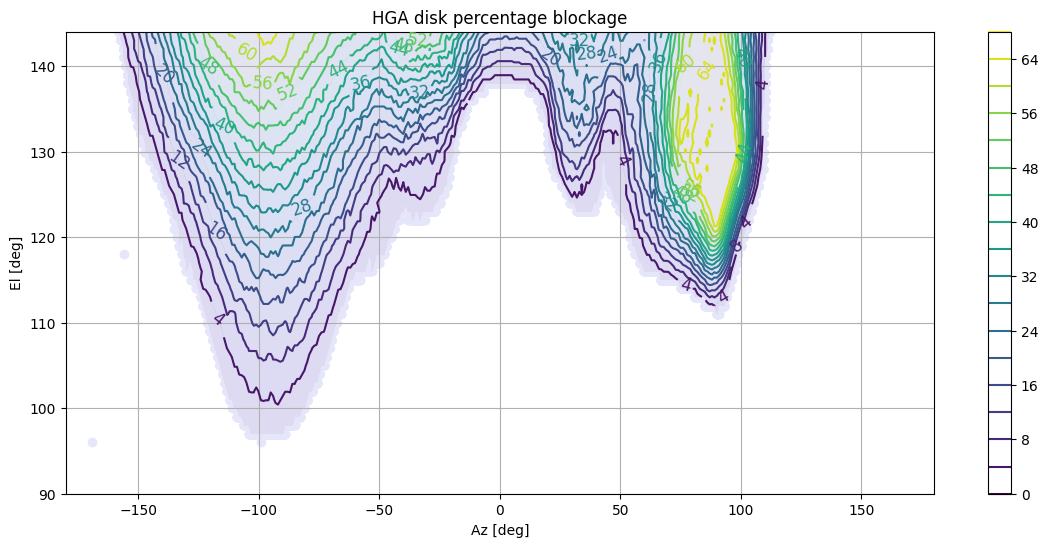

In [47]:
fig = plt.figure(figsize=(14, 6))

plt.scatter(output_b[:, 2], output_b[:, 1], color='lavender')
plt.xlim([-180, 180])
plt.ylim([-5, 145])

plt.contourf(range(-180, 181), range(-5, 145), coverage, 20, alpha=0.05)
contour_lines = plt.contour(range(-180, 181), range(-5, 145), coverage, 20)
plt.clabel(contour_lines, contour_lines.levels, inline=True, fmt='%1.0f', fontsize=12)
plt.colorbar()
plt.ylim([90, 144])
plt.grid()
plt.ylabel('El [deg]')
plt.xlabel('Az [deg]')
plt.title('HGA disk percentage blockage')
plt.show()